In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

video_count = pd.read_csv('video_count.csv', parse_dates=['date'])
video_count.head()

FileNotFoundError: File b'video_count.csv' does not exist

In [ ]:
counts = video_count['count']
counts.describe()

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set the graph parameters
sns.set(rc={"figure.figsize": (20.0, 10.0), "axes.labelsize": 18})

ax = sns.scatterplot(x="video_id", y="count", data=video_count, size = 'count', hue="count")
ax.set_title('Video vs Count')
ax.set_xlabel('Video Id')
ax.set_ylabel('Count')

NameError: name 'video_count' is not defined

In [ ]:
video_features = pd.read_csv('video_features.csv', parse_dates=['video_upload_date'])
video_features.head()

In [5]:
data = pd.merge(right=video_features, left=video_count, on='video_id', how='left')
data.head()

,video_id,count,date,video_length,video_language,video_upload_date,video_quality
0,2303,22,2015-01-07,1071,Cn,2014-12-10,1080p
1,1193,54854,2015-01-12,770,Other,2014-12-07,720p
2,1219,1788779,2015-01-03,904,Cn,2014-12-12,240p
3,1472,234,2015-01-04,157,Other,2014-12-10,240p
4,2947,14407,2015-01-08,446,Cn,2014-12-19,480p


In [6]:
data['days'] = (data['date'] - data['video_upload_date']).apply(lambda x: x.days)
data.head()

,video_id,count,date,video_length,video_language,video_upload_date,video_quality,days
0,2303,22,2015-01-07,1071,Cn,2014-12-10,1080p,28
1,1193,54854,2015-01-12,770,Other,2014-12-07,720p,36
2,1219,1788779,2015-01-03,904,Cn,2014-12-12,240p,22
3,1472,234,2015-01-04,157,Other,2014-12-10,240p,25
4,2947,14407,2015-01-08,446,Cn,2014-12-19,480p,20


In [7]:
data["video_language"] = data["video_language"].astype('category')
data["video_quality"] = data["video_quality"].astype('category')
data['video_id'] = data['video_id'].astype('category')

data["video_language"] = data["video_language"].cat.codes
data["video_quality"] = data["video_quality"].cat.codes

data.head()

,video_id,count,date,video_length,video_language,video_upload_date,video_quality,days
0,2303,22,2015-01-07,1071,0,2014-12-10,0,28
1,1193,54854,2015-01-12,770,5,2014-12-07,4,36
2,1219,1788779,2015-01-03,904,0,2014-12-12,1,22
3,1472,234,2015-01-04,157,5,2014-12-10,1,25
4,2947,14407,2015-01-08,446,0,2014-12-19,3,20


In [8]:
data.describe()

,count,video_length,video_language,video_quality,days
count,4.177500e+04,41775.000000,41775.000000,41775.000000,41775.000000
mean,6.243710e+05,684.813285,2.210772,2.042729,26.885458
std,8.879097e+05,422.420884,1.839278,1.557063,7.061374
min,1.000000e+00,9.000000,0.000000,0.000000,8.000000
25%,9.095500e+03,363.000000,0.000000,0.000000,22.000000
50%,1.795580e+05,631.000000,2.000000,2.000000,27.000000
75%,9.043615e+05,973.000000,3.000000,3.000000,32.000000
max,6.070570e+06,2114.000000,5.000000,4.000000,44.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0ef3d2e8>,
      dtype=object)

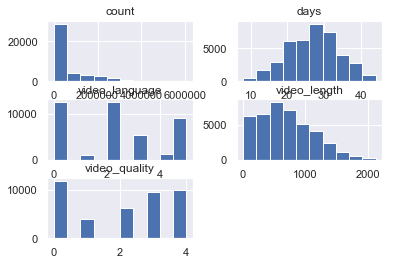

In [9]:
data.hist()

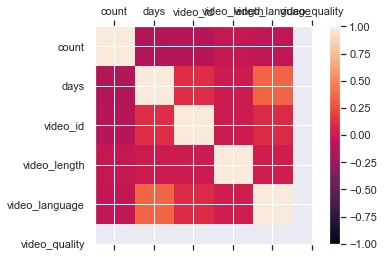

In [10]:
import numpy as np
correlations = data.corr()
names = ['count', 'days', 'video_id', 'video_length', 'video_language', 'video_quality']
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [11]:
# These videos can be considered as Stable and Popular 
filtered_data = data.loc[data['count'] > 3500000]
filtered_data.shape

rows_stable= len(filtered_data)
print(rows_stable)

349


Text(0,0.5,'Count')

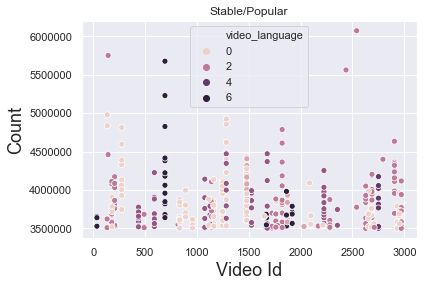

In [12]:
ax = sns.scatterplot(x="video_id", y="count", data=filtered_data, hue = 'video_language')
ax.set_title('Stable/Popular')
ax.set_xlabel('Video Id')
ax.set_ylabel('Count')

In [13]:
filtered_data.head()

,video_id,count,date,video_length,video_language,video_upload_date,video_quality,days
325,590,3669399,2015-01-12,424,3,2014-12-16,3,27
353,2628,3841157,2015-01-11,463,2,2014-12-18,4,24
365,1152,3560052,2015-01-13,567,2,2014-12-17,2,27
371,2905,4624117,2015-01-10,420,2,2014-12-16,0,25
389,2225,3968644,2015-01-03,497,3,2014-12-13,2,21


In [14]:
filtered_data_video_length = filtered_data['video_length']
filtered_data_video_length.describe()

count     349.000000
mean      616.839542
std       303.815710
min        15.000000
25%       424.000000
50%       561.000000
75%       710.000000
max      1366.000000
Name: video_length, dtype: float64

In [15]:
filtered_data_video_quality = filtered_data['video_quality']
filtered_data_video_quality.describe()

count    349.000000
mean       1.936963
std        1.554206
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: video_quality, dtype: float64

In [16]:
filtered_data_video_language = filtered_data['video_language']
filtered_data_video_language.describe()

count    349.000000
mean       1.730659
std        1.541273
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: video_language, dtype: float64

In [17]:
# Calculate increase rate of the videos per day
filtered_data['increase_rate'] = filtered_data['count'] / filtered_data['days']
filtered_data.head()

,video_id,count,date,video_length,video_language,video_upload_date,video_quality,days,increase_rate
325,590,3669399,2015-01-12,424,3,2014-12-16,3,27,135903.666667
353,2628,3841157,2015-01-11,463,2,2014-12-18,4,24,160048.208333
365,1152,3560052,2015-01-13,567,2,2014-12-17,2,27,131853.777778
371,2905,4624117,2015-01-10,420,2,2014-12-16,0,25,184964.680000
389,2225,3968644,2015-01-03,497,3,2014-12-13,2,21,188983.047619


In [18]:
# We can consider video to be 'Hot' if its increase/day rate is above certain value

In [19]:
filtered_data2=filtered_data.loc[filtered_data['increase_rate'] > 150000]
filtered_data2['Category'] = 'HOT'
filtered_data2.head()

,video_id,count,date,video_length,video_language,video_upload_date,video_quality,days,increase_rate,Category
353,2628,3841157,2015-01-11,463,2,2014-12-18,4,24,160048.208333,HOT
371,2905,4624117,2015-01-10,420,2,2014-12-16,0,25,184964.680000,HOT
389,2225,3968644,2015-01-03,497,3,2014-12-13,2,21,188983.047619,HOT
467,2971,3532115,2015-01-02,1148,2,2014-12-14,2,19,185900.789474,HOT
1207,2905,3989991,2015-01-02,420,2,2014-12-16,0,17,234705.352941,HOT


In [20]:
filtered_data2.shape
rows_hot = len(filtered_data2)
print(rows_hot)

138


In [21]:
filtered_data3 = data.loc[data['count'] < 300000]
filtered_data3.shape
rows_others= len(filtered_data3)
print(rows_others)

24236


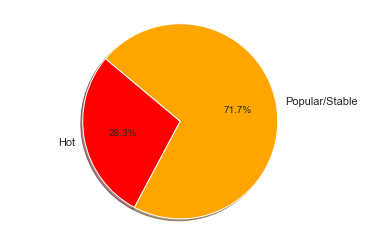

In [22]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Hot', 'Popular/Stable'
sizes = [rows_hot, rows_stable ]
colors = ['Red', 'Orange']

 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

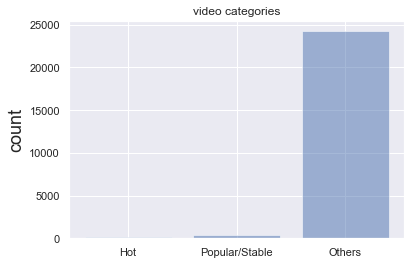

In [23]:
import matplotlib.pyplot as plt; 
import numpy as np

 
objects = ('Hot', 'Popular/Stable', 'Others')
y_pos = np.arange(len(objects))
performance = [rows_hot,rows_stable,rows_others]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('count')
plt.title('video categories')
plt.show()

In [24]:
data.dtypes

video_id                   category
count                         int64
date                 datetime64[ns]
video_length                  int64
video_language                 int8
video_upload_date    datetime64[ns]
video_quality                  int8
days                          int64
dtype: object

In [26]:
from sklearn.cluster import KMeans

data = data.drop(['video_upload_date', 'date'], axis=1)

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(data)

# Predicitng a single input
#predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
labels = model.predict(data)
cent = model.cluster_centers_
kmeans = pd.DataFrame(labels)
data.insert((data.shape[1]),'kmeans',kmeans)

# Printing Predictions
#print(predicted_label)
print(labels)

KeyError: "labels ['video_upload_date' 'date'] not contained in axis"

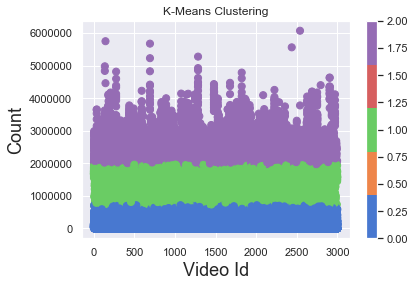

In [27]:
from matplotlib.colors import ListedColormap

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['video_id'],data['count'],
                     c=kmeans[0],s=50, cmap = cmap)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Video Id')
ax.set_ylabel('Count')
plt.colorbar(scatter)

In [28]:
data.head()

,video_id,count,video_length,video_language,video_quality,days,kmeans
0,2303,22,1071,0,0,28,0
1,1193,54854,770,5,4,36,0
2,1219,1788779,904,0,1,22,1
3,1472,234,157,5,1,25,0
4,2947,14407,446,0,3,20,0


In [29]:
hot = data[(data['kmeans'] == 2)]
hot.describe()

,count,video_length,video_language,video_quality,days,kmeans
count,4.863000e+03,4863.000000,4863.000000,4863.000000,4863.000000,4863.0
mean,2.634035e+06,543.707794,1.731441,1.930290,25.383302,2.0
std,5.219543e+05,319.492092,1.735921,1.543778,5.140189,0.0
min,1.960388e+06,9.000000,0.000000,0.000000,14.000000,2.0
25%,2.227030e+06,311.000000,0.000000,0.000000,22.000000,2.0
50%,2.527591e+06,532.000000,2.000000,2.000000,25.000000,2.0
75%,2.921158e+06,748.000000,3.000000,3.000000,29.000000,2.0
max,6.070570e+06,1858.000000,5.000000,4.000000,37.000000,2.0


In [30]:
stable_popular = data[(data['kmeans'] == 1)]
stable_popular.describe()

,count,video_length,video_language,video_quality,days,kmeans
count,7.003000e+03,7003.000000,7003.000000,7003.000000,7003.000000,7003.0
mean,1.284509e+06,634.581608,2.093817,2.042553,26.442667,1.0
std,3.710007e+05,407.529155,1.841916,1.529456,5.050922,0.0
min,7.146070e+05,15.000000,0.000000,0.000000,14.000000,1.0
25%,9.522100e+05,321.000000,0.000000,0.000000,23.000000,1.0
50%,1.246261e+06,574.000000,2.000000,2.000000,27.000000,1.0
75%,1.617588e+06,881.000000,3.000000,3.000000,30.000000,1.0
max,1.960121e+06,2064.000000,5.000000,4.000000,43.000000,1.0


In [31]:
other = data[(data['kmeans'] == 0)]
other.describe()

,count,video_length,video_language,video_quality,days,kmeans
count,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.0
mean,143046.288274,719.517503,2.316092,2.061052,27.233375,0.0
std,185058.802020,434.426463,1.841010,1.564884,7.671003,0.0
min,1.000000,10.000000,0.000000,0.000000,8.000000,0.0
25%,895.000000,380.000000,0.000000,0.000000,22.000000,0.0
50%,54295.000000,680.000000,2.000000,2.000000,27.000000,0.0
75%,228523.000000,1041.000000,4.000000,3.000000,33.000000,0.0
max,714472.000000,2114.000000,5.000000,4.000000,44.000000,0.0
